In [ ]:
import numpy as np
import pandas as pd

In [ ]:
a = np.array(4)
a.ndim
print(a) 

b = np.array([1,2,3,4,5])
b.ndim
print(b)

4
[1 2 3 4 5]


#---------------------------------------------------------------------------------------------------------------------------------------------  
  
  **Let's move to some technical concepts**
  
#---------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
df = pd.read_csv('/content/ML_3_Placement.csv')

In [ ]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


**Step 1: Preprocess of Data:**

In [ ]:
# Detecting the information about our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.2 KB


In [ ]:
# Getting no. of rows and columns
df.shape

(100, 4)

In [ ]:
# Removing non useful parameters
# As Unnamed: 0 column is not any kind of useful for our model so we must remove it.
df_1 = df.iloc[:, 1:]
df_1

# Now no. of rows are updated to 3.

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0
...,...,...,...
95,4.3,200.0,0
96,4.4,42.0,0
97,6.7,182.0,1
98,6.3,103.0,1


**Step 2: Performing EDA**

In [ ]:
#For analyzing and visualizing data using plots we use matplotlib module 

import matplotlib.pyplot as plt

Text(0, 0.5, 'IQ')

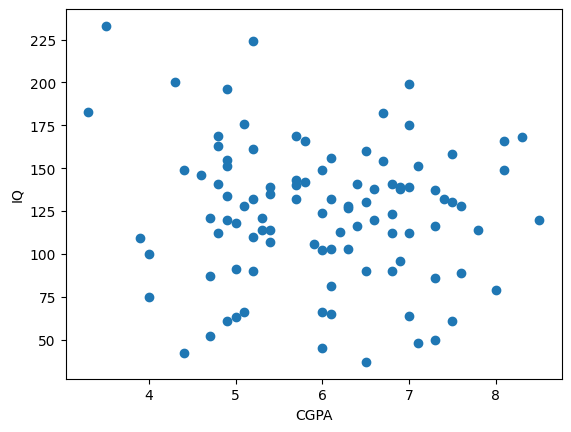

In [ ]:
# Plotting data points for students CGPA with their IQ
plt.scatter(df_1['cgpa'], df_1['iq'])
plt.xlabel('CGPA')
plt.ylabel('IQ')

Text(0, 0.5, 'IQ')

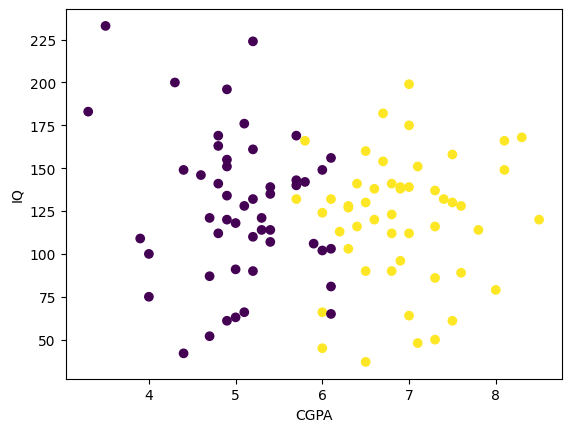

In [ ]:
# Coloring the data points for placed students
plt.scatter(df_1['cgpa'], df_1['iq'], c=df_1['placement'])
plt.xlabel('CGPA')
plt.ylabel('IQ')

**Step 3: Extract Input and Output**

In [ ]:
# Now finding relaltionship between data and vizualizing it
# So ultimately we can observe mostly the placement depends on cgpa and iq of the student
# So we can say that cgpa and iq are an independent variables and placement is an dependent variable

X = df_1.iloc[:, 0:2]  # Selecting all rows and 1st and 2nd columns as independent variables and storing it in variable X
                       # i.e, from 0th col to 2-1 column we store the vlaues 

Y = df_1.iloc[:, -1]   # Selecting all rows and just last column as dependent variable and storing it in variable Y
                       # i.e, for last column we select parameter as -1

In [ ]:
# Printing the independent variables
X

# After running it we will show that there are 100 rows and 2 columns which means it is an 2-D Tensor 

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [ ]:
# Printing the dependent variables
Y

# After running it we will show that there are 100 rows and 1 column which means it is an 1-D Tensor

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

**Step 4: Train Test Split**

In [ ]:
# From our overall dataset we firstly split it into 2 parts in ratio 7:3, 9:1, 8:2 according to the situation and environment of data.
# (i) For Training and (ii) For Testing
# In training section our model learns relationship from the data by input and output
# In testing it creates the relationship, makes model and check that whatever it learns from training section after applying to testing section is it giving good accuracy output for testing inputs in dataset.

from sklearn.model_selection import train_test_split

#Here we created 4 objects X_train, X_test, y_train, y_test
#In X_train it will store inputs of training dataset
#In X_test it will store inputs of testing dataset
#In y_train it will store outputs of training dataset
#In y_test it will store outputs of testing dataset
#splitting of training and testing from the overall dataset, we set to 9:1

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1)

In [ ]:
#Inputs of training dataset
X_train

,cgpa,iq
85,5.8,166.0
48,6.6,138.0
16,5.2,224.0
47,5.2,161.0
78,6.1,81.0
...,...,...
73,4.9,61.0
79,6.5,90.0
17,3.3,183.0
88,4.4,149.0


In [ ]:
#Inputs of testing dataset
X_test

,cgpa,iq
10,6.0,45.0
0,6.8,123.0
80,4.9,196.0
29,7.0,112.0
59,4.8,112.0
9,5.1,66.0
97,6.7,182.0
36,5.7,140.0
71,6.1,132.0
41,5.4,114.0


In [ ]:
#Outputs of training dataset
y_train
y_train = y_train.values

In [ ]:
#Outputs of testing dataset
y_test
y_test = np.array(y_test).reshape(-1, 1)
y_test


array([[1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0]])

### **Step 5: Scale the Values**

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# StandardScalar() is used for standardizing features in a dataset. Standardization is a common data preprocessing technique where the features are transformed to have zero mean and unit variance.
# Formula: z = (x - u) / s, where 
# z is the standardized value of a feature
# x is the original value of the feature
# u is the mean of the feature values in the dataset
# s is the standard deviation of the feature values in the dataset

scalar = StandardScaler()

**fit(X):** This method is used to compute the mean (u) and standard deviation (s) of each feature in the dataset. X represents the dataset, which is typically a 2-dimensional array-like object (e.g., NumPy array, pandas DataFrame).

**transform(X):** This method is used to standardize the features in the dataset based on the mean and standard deviation computed by the fit method. It returns a new array-like object with the standardized values.

Additionally, there is a convenience method called **fit_transform(X)** that combines the fit and transform steps in a single operation. This method is often used during the preprocessing stage to both learn the scaling parameters from the data and apply the standardization in one call.  
  
For EXAMPLE:
  
    
    data = [[1, 2], [3, 4], [5, 6]]   
  

For the first feature [1, 3, 5]:

Mean (u) = (1 + 3 + 5) / 3 = 3
Standard deviation (s) = sqrt(((1 - 3)² + (3 - 3)² + (5 - 3)²) / 3) ≈ 1.63
For the second feature [2, 4, 6]:

Mean (u) = (2 + 4 + 6) / 3 = 4
Standard deviation (s) = sqrt(((2 - 4)² + (4 - 4)² + (6 - 4)²) / 3) ≈ 1.63
Then, the standardized values (z) are calculated as follows:

For the first feature [1, 3, 5]:

[1 - 3 / 1.63, 3 - 3 / 1.63, 5 - 3 / 1.63] ≈ [-1.226993865030, 0.00, 1.226993865030]  

For the second feature [2, 4, 6]:
[2 - 4 / 1.63, 4 - 4 / 1.63, 6 - 4 / 1.63] = [-1.226993865030, 0.00, 1.226993865030]

In [ ]:
# To learn the scaling parameters from data and Standardizing features in dataset 
X_train = scalar.fit_transform(X_train)
X_train

array([[-0.17646995,  1.07508753],
       [ 0.50663954,  0.36288443],
       [-0.68880207,  2.55036537],
       [-0.68880207,  0.94790841],
       [ 0.07969611, -1.08695758],
       [-1.03035682,  0.43919191],
       [ 1.27513772, -1.59567408],
       [ 1.36052641, -0.88347098],
       [-0.85957945, -0.83259933],
       [-0.00569258,  0.00678289],
       [ 1.10436035,  0.33744861],
       [ 0.25047348, -0.52736944],
       [ 1.10436035, -1.87546815],
       [-0.94496813,  0.69355016],
       [ 0.42125086,  0.15939784],
       [ 0.42125086, -2.20613388],
       [-1.11574551, -1.8245965 ],
       [-2.14040975,  2.7792878 ],
       [-0.00569258, -1.46849495],
       [ 0.07969611,  0.82072928],
       [ 0.7628056 ,  0.36288443],
       [ 1.78746984,  0.64267851],
       [ 0.16508479, -0.27301119],
       [ 1.53130378, -0.24757536],
       [-0.68880207, -0.34931866],
       [ 0.33586217, -0.19670371],
       [ 0.50663954, -0.09496041],
       [-1.03035682,  0.99878006],
       [ 0.84819429,

In [ ]:
# Directly called transform because model already understood the pattern during training
# So there is no need to fit again
X_test = scalar.transform(X_test)
X_test

array([[-0.00569258, -2.00264728],
       [ 0.67741692, -0.01865294],
       [-0.94496813,  1.83816228],
       [ 0.84819429, -0.29844701],
       [-1.03035682, -0.29844701],
       [-0.77419076, -1.46849495],
       [ 0.59202823,  1.48206073],
       [-0.26185864,  0.41375608],
       [ 0.07969611,  0.21026949],
       [-0.5180247 , -0.24757536]])

### **Step 6: Train the Model**

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# Assigning LogisticLinear() function in clf object
clf = LogisticRegression() 

In [ ]:
# Model Training
clf.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# Finding predicted output for X_test input

y_pred = clf.predict(X_test)
y_pred

array([0, 1, 0, 1, 0, 0, 1, 0, 1, 0])

In [ ]:
y_test

array([[1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0]])

### **Step 7: Evaluate the Model/Model Selection**

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
# Comparing original data with predicted data

accuracy_score(y_pred, y_test)

0.9

In [ ]:
!pip install mlxtend --upgrade --no-deps

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 27.0 MB/s eta 0:00:00
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


In [ ]:
!pip install --upgrade mlxtend

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


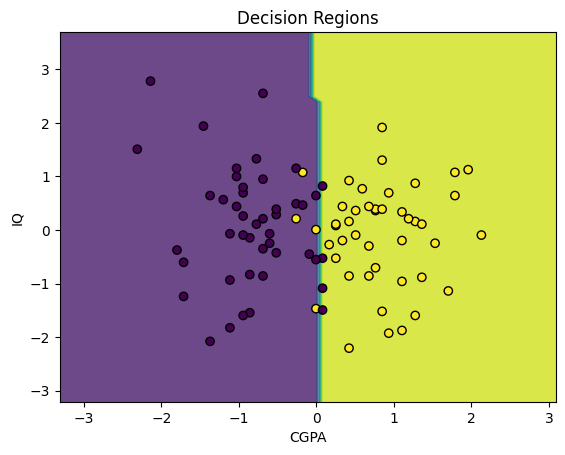

In [ ]:
# How to plot the decision  boundaries
# What pattern does our machine learning model noticed in our data

import matplotlib.pyplot as plt

# Define a meshgrid of points
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Make predictions on the meshgrid points
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision regions
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolor='k')
plt.xlabel('CGPA')
plt.ylabel('IQ')
plt.title('Decision Regions')
plt.show()

### **Step 8: Deploy the Model**

In [ ]:
# Creates object to file
import pickle

# This file then we can deploy 

In [ ]:
pickle.dump(clf, open('model.pkl', 'wb'))

# This file will have the predicted function which we can deploy on our website

#--------------------------------------------------------------------------------------------------------------------------------------------  
  
#**KHATAM**  
  
#--------------------------------------------------------------------------------------------------------------------------------------------

# **# FRAMING ML Problem**   
  
**1. Business Problem to ML Problem**

Suppose let's  take asn example of Netflix  
A task to increase revenue is allotted to us. So one way is to increase the customers by good marketing.  
Other way is to charge more from the existing customers.  
And another way is to decrese churn ratio (Create/make interest for already existing customers, so that he will not leave the platform)  
     
       

**2.Type of Problem**

Identify what type of problem is it.  
Problem Scenario --> End product --> Prediction  
So for this task we will firstly identify which customers are going to leave the platform, for this we can use Classification Model.   
Another thing is we can predict percentage of leaving, for customer who is predicted to leave (Like someone is mostly going to leave the platform 90% , Someone is not sure about leaving the platform 40% , Someone is thinking to leave the platform 15% ). So here we can use Regression model.  
Problems can be:  
(i)   The user is old age and is not able to navigate the platform properly.  
(ii)  The user is having network issue at his location.  
(iii) The user feels that he/she is wasting money on it, and the platform is not worth of the money. So that we can give him discount and there can be good chances he won't leave the platform and continues the platform.  
(iv) He/she is not getting the content he want.  
  
**3. Current Solution:**  
It might be possible that someone had already worked on analysis or solution for the Problem statement.  
So we can see what factors he considered, what methods he applied, and ultimately what output he got.   
So atleast something we will get from it on what he worked. So we can take the methodologies he applied and can continue work on it.  
  
**4. Getting Data:**  
(i) Watch Time:  
Analyzing how much time user spent on Netflix in a month. How much time he spent on browsing, how much time he spent on watching Movie.  
  
(ii) Searched but did not found:  
How much searches does the user did and how much he didn't found.  
  
(iii) Content left in Middle:  
User stopped watching content in between, this shows Netflix is not giving the quality thing that the user wants/expected in that content. (Either the Picture Quality, Audio Quality, Dubbing Quality, etc).  
  
(iv) Clicked on recommendation (order of recommendation):  
On How many recommendation does a user clicked, This will help us to know how much we are understanding the user's sentiment. Like this helps us to understand what kind of Movie does the user expects, what kind of interest user have, what kind of movie user likes.  
    

**5. Metrics to measure:**   
This will tell us how accurate our model is.  
Like how much is the difference between the predicted customer who are going to leave and how many customers actually leaved the platform.  
Or are there the same customers which are predicted that they will be going to leave the platform or some other customers leaved the platform.  
So for this defining metrics is must.  
  
**6. Online/Batch Learning:**  
Choosing whether to choose Online Learning which is continuously updated over the internet.  
Or batch learning in which we have to manually collect new data and perform operations on it.  
  
OLTP --> Data Warehousing --> model --> training --> Output  
  
**7. Check Assumptions:**  
Features/columns we selected are really available or not.  
Is model we used is applicable to all users over the period of time? over the regions?   
Is the model we used is sufficient or some more models we need to add or some different model we need to use.  
